<a href="https://colab.research.google.com/github/mainadwitiya/Daily_usage_codes/blob/main/annotation_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xml.etree.ElementTree as ET
import cv2
import os
import shutil

In [ ]:
img_path = r"/app/bank_cheque_extraction/data/image_dir/data"
xml_path = r"/app/bank_cheque_extraction/data/xml_dir/data"
images_without_xml = r"/app/bank_cheque_extraction/validation/images_without_xml"
faulty_image_coordinates = r"/app/bank_cheque_extraction/validation/faulty_image_coordinates"
new_xml_clean_path = r"/app/bank_cheque_extraction/validation/corrected_xmls_classes"
images_with_bounding_boxes_path = r"/app/bank_cheque_extraction/validation/box_validation"

In [ ]:
i=0
for xml in os.listdir(xml_path):
    if xml.split(".")[-1].lower() == "xml":
        xml_dir_path = os.path.join(xml_path,xml)
        tree = ET.parse(xml_dir_path)
        root = tree.getroot()   
        image_name = xml.split(".")[0]+".jpg"
        img = cv2.imread(os.path.join(img_path,image_name))
        for child in root.findall("./object"):
            for child_obj in child:
                if child_obj.tag == "name":
                    attr_bname = child_obj.text
                if child_obj.tag == "bndbox":
                    location = []
                    for child_bnd_box in child_obj:
                        location.append(int(child_bnd_box.text))
                    #print(location)

                    rec_img = cv2.rectangle(img,(location[0],location[1]),(location[2],location[3]),(0,255,0),2)
                    cv2.putText(rec_img, attr_bname, (location[0], location[1]+20), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)

        cv2.imwrite(os.path.join(images_with_bounding_boxes_path,image_name),rec_img)
        i+=1

In [ ]:
for image in os.listdir(img_path):
    xml_name = image_name = image.split(".")[0]+".xml"
    if xml_name not in os.listdir(xml_path):
        shutil.move(os.path.join(img_path,image),os.path.join(images_without_xml,image))
        

In [ ]:
i=0
for xml in os.listdir(xml_path):
    x_flag = False
    y_flag = False
    if xml.split(".")[-1].lower() == "xml":
        xml_dir_path = os.path.join(xml_path,xml)
        tree = ET.parse(xml_dir_path)
        root = tree.getroot() 
        for child in root:
            if child.tag == "size":
                for child_obj in child:
                    if child_obj.tag == "width":
                        image_width = child_obj.text
                    if child_obj.tag == "height":
                        image_height = child_obj.text
        for child in root.findall("./object"):
            for child_obj in child:
                if child_obj.tag == "name":
                    attr_bname = child_obj.text
                if child_obj.tag == "bndbox":
                    location = []
                    for child_bnd_box in child_obj:
                        location.append(int(child_bnd_box.text))
                    x_min = int(image_width)/int(location[0])
                    y_min = int(image_height)/int(location[1])
                    x_max = int(image_width)/int(location[2])
                    y_max = int(image_height)/int(location[3])
                    
#                     print(type(x_min),type(x_max),type(image_width))
                    if int(x_min) < 0 or int(x_max) > int(image_width):
                        print(xml)
                        x_flag = True
                    
                    if int(y_min) < 0 or int(y_max) > int(image_height):
                        print(xml)
                        y_flag = True
                        
                        
        if x_flag == True or y_flag == True:
            shutil.move(os.path.join(image_path,xml.split(".")[0]+".jpg"),os.path.join(faulty_image_coordinates,xml.split(".")[0]+".jpg"))
            shutil.move(os.path.join(xml_path,xml),os.path.join(faulty_image_coordinates,xml))

# Find unique classes in the xml

In [ ]:
def class_names_check_xml(ip_xml_path,new_xml_path):
    classes = []
    for xml in os.listdir(ip_xml_path):
        if xml.split(".")[-1].lower() == "xml":
            xml_dir_path = os.path.join(ip_xml_path,xml)
            tree = ET.parse(xml_dir_path)
            root = tree.getroot() 
            for child in root.findall("./object"):
                for child_obj in child:
                    if child_obj.tag == "name":
                        attr_name = child_obj.text
                        classes.append(attr_name)
                        if attr_name == "Footer":
                            child_obj.text = "footer"
                        elif attr_name == "Header":
                            child_obj.text = "header"
                        elif attr_name == "Section":
                            child_obj.text = "section"
                        elif attr_name == "Table of Content":
                            child_obj.text = "content"
            tree.write(os.path.join(new_xml_path,xml))
    
    return set(classes)
                    


In [ ]:
out_classes = class_names_check_xml(xml_path,new_xml_clean_path)
print(out_classes)

{'account_no', 'micr', 'ifsc'}


In [ ]:
set(out_classes)

{'account_no', 'ifsc', 'micr'}

In [ ]:
image_p = r"E:\office\docinsight\annotation_completed\annotation\AHM 4A_GCC\images\images\out_11.jpg"

In [ ]:
img = cv2.imread(image_p)

In [ ]:
cropped_img = img[2039:3274,116:4004]

In [ ]:
cv2.imwrite(r"E:\office\docinsight\annotation_completed\annotation\AHM 4A_GCC\images\cropped.jpg",cropped_img)

In [ ]:
img = cv2.imread(r"E:\office\datasheets\bhushan_datasheets\SAMPLE-1 06.07.20\400KV GIS-ABB\90fcb02a-c590-4a49-be10-00f6a948c691-15.jpg")

In [ ]:
cropped_img = img[864:1752,108:1536]

In [ ]:
cv2.imwrite(r"E:\office\datasheets\bhushan_datasheets\SAMPLE-1 06.07.20\400KV GIS-ABB\15.jpg",cropped_img)

True

In [ ]:
cropped_img

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
import matplotlib.pyplot as plt

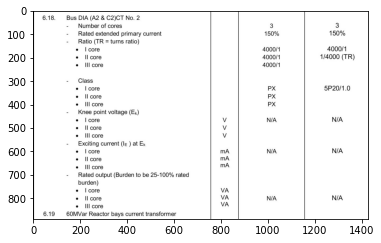

In [ ]:
plt.imshow(cropped_img)

In [ ]:
import numpy as np

In [ ]:
# img = cv2.imread(cropped_img)
kernel = np.ones((3,3),np.uint8)
erosion = cv2.dilate(cropped_img,kernel,iterations = 4)

In [ ]:
plt.imshow(erosion)

In [ ]:
def skeletonize(image, structuring=cv2.MORPH_RECT):
    # determine the area (i.e. total number of pixels in the image),
    # initialize the output skeletonized image, and construct the
    # morphological structuring element
    area = image.shape[0] * image.shape[1]
    skeleton = np.zeros(image.shape, dtype="uint8")
    elem = cv2.getStructuringElement(structuring, (3,3))
 
    # keep looping until the erosions remove all pixels from the
    # image
    while True:
        # erode and dilate the image using the structuring element
        eroded = cv2.erode(image, elem)
        temp = cv2.dilate(eroded, elem)
 
        # subtract the temporary image from the original, eroded
        # image, then take the bitwise 'or' between the skeleton
        # and the temporary image
        temp = cv2.subtract(image, temp)
        skeleton = cv2.bitwise_or(skeleton, temp)
        image = eroded.copy()
 
        # if there are no more 'white' pixels in the image, then
        # break from the loop
        if area == area - cv2.countNonZero(image):
            break
 
    # return the skeletonized image
    return skeleton

In [ ]:
skeletonize(cropped_img, (3,3), structuring=cv2.MORPH_RECT)

TypeError: skeletonize() got multiple values for argument 'structuring'